# SVC = Support Vector Classifier

First we will load the previous Logisitc Regression Model here.

In [2]:
# usual imports
import numpy as np 
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics, svm
from sklearn.pipeline import make_pipeline
from sklearn.calibration import CalibratedClassifierCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [3]:
df = pd.read_csv("loan_data.csv")

# cleanup and category conversion

df.person_gender =[1 if value == "male" else 0 for value in df.person_gender]
# ordinal categories
category_mapper = {'Doctorate': 4, 'Master': 3, 'Bachelor': 2, 'Associate': 1, 'High School': 0}
df['person_education'] = df['person_education'].map(category_mapper)

# convert binary categories
df.previous_loan_defaults_on_file =[1 if value == "Yes" else 0 for value in df.previous_loan_defaults_on_file]

# One-hot encode nominal variables
from sklearn.preprocessing import OneHotEncoder

variables = ['person_home_ownership', 'loan_intent']

# use encoder
encoder = OneHotEncoder(sparse_output=False).set_output(transform="pandas")
one_hot_encoded = encoder.fit_transform(df[variables]).astype(int)
df = pd.concat([df,one_hot_encoded],axis=1).drop(columns=variables)

df.head()


,person_age,person_gender,person_education,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,...,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,22.0,0,3,71948.0,0,35000.0,16.02,0.49,3.0,561,...,0,0,0,1,0,0,0,0,1,0
1,21.0,0,0,12282.0,0,1000.0,11.14,0.08,2.0,504,...,0,0,1,0,0,1,0,0,0,0
2,25.0,0,0,12438.0,3,5500.0,12.87,0.44,3.0,635,...,1,0,0,0,0,0,0,1,0,0
3,23.0,0,2,79753.0,0,35000.0,15.23,0.44,2.0,675,...,0,0,0,1,0,0,0,1,0,0
4,24.0,1,3,66135.0,1,35000.0,14.27,0.53,4.0,586,...,0,0,0,1,0,0,0,1,0,0


In [4]:
# logistic regression model

# Prepare the model
y = df["loan_status"] # our target variable
X = df.drop(["loan_status"], axis=1) # our predictors

from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()

# Fit the scaler to the data and transform the data
X_scaled = scaler.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, random_state=42)

from sklearn.linear_model import LogisticRegression

# Create logistic regression model
lr = LogisticRegression()

# Train the model on the training data
lr.fit(X_train, y_train)

# Predict the target variable on the test data
y_pred = lr.predict(X_test)

In [6]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1]))

Accuracy: 0.8942962962962963
Precision: 0.7709190672153635
Recall: 0.747588959095444
F1 Score: 0.7590747931791322
ROC-AUC Score: 0.9530489406353883


# Initialize the SVC -model and fit the data in (start training)

Feature Scaling basically helps to normalizes the data within a particular range. 

In [3]:
# Feature scaling is essential for SVC!
sc_X = StandardScaler()
sc_y = StandardScaler()

In [8]:
# Prepare the model
y = df["loan_status"] # our target variable
X = df.drop(["loan_status"], axis=1) # our predictors

In [9]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fitting SVR to the dataset
## Analysis:
The SVC model achieved a 91.5% overall accuracy

In [18]:
model = make_pipeline(StandardScaler(), svm.SVC(probability=True))
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(probability=True))])

In [19]:
# Get test predictions for evaluation metrics
predictions = model.predict(X_test)

In [20]:
# Classification metrics
# print the classification report based on true values and predictions
print(classification_report(y_test, predictions))

# get overall accuracy of the model and print it
acc = accuracy_score(y_test, predictions)
print("\nModel overall accuracy: {:.2f}%".format(acc * 100))
print("\n")

              precision    recall  f1-score   support

           0       0.93      0.96      0.95     10493
           1       0.85      0.76      0.80      3007

    accuracy                           0.91     13500
   macro avg       0.89      0.86      0.87     13500
weighted avg       0.91      0.91      0.91     13500


Model overall accuracy: 91.50%




<Axes: >

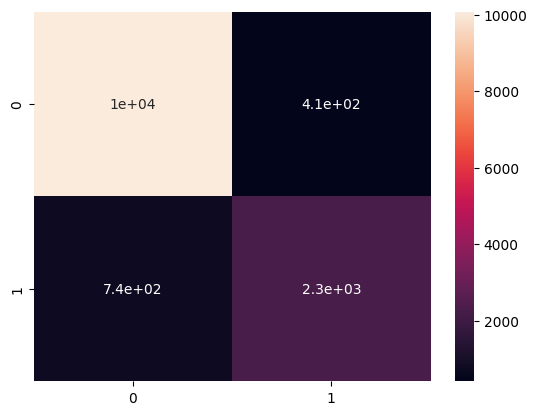

In [21]:
# Confusion matrix
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, predictions), annot=True)

In [22]:
# ROC-AUC -score

roc_auc_score(y_test.values, model.predict_proba(X_test)[:, 1])


np.float64(0.9624308425358145)

# Personal Analysis: SVC vs Linear Regression
SVC achieved higher accuracy, indicating better performance in capturing complex patterns where Logistic Regression is simpler and easier to interpret but may not handle non-linear relationships as effectively.

## Model Performance Comparison
- Logistic Regression 89.0%  accuracy
- SVC (Standard Scaler)	91.5% Accuracy

## Where Could These Models Be Useful?
- Logistic Regression: Ideal for scenarios requiring interpretability.
- SVC: Suitable for complex classification.

## Ideas for Optimization
- Utilize GridSearchCV to find optimal values for parameters like C and gamma.
- Implement k-fold cross-validation to ensure model robustnesses.
- Experiment with different kernels like polynomial, sigmoid.


# Trying with different Kernels

In [26]:
svc_model_rbf = make_pipeline(StandardScaler(), svm.SVC(kernel='rbf', C=1, gamma='scale'))
svc_model_rbf.fit(X_train, y_train)
predictions = svc_model_rbf.predict(X_test)

print(classification_report(y_test, predictions))

# get overall accuracy of the model and print it
acc = accuracy_score(y_test, predictions)
print("\nModel overall accuracy: {:.2f}%".format(acc * 100))
print("\n")

              precision    recall  f1-score   support

           0       0.93      0.96      0.95     10493
           1       0.85      0.76      0.80      3007

    accuracy                           0.91     13500
   macro avg       0.89      0.86      0.87     13500
weighted avg       0.91      0.91      0.91     13500


Model overall accuracy: 91.50%




In [27]:
svc_model_linear = make_pipeline(StandardScaler(), svm.SVC(kernel='linear', C=1, gamma='scale'))
svc_model_linear.fit(X_train, y_train)
predictions = svc_model_linear.predict(X_test)

print(classification_report(y_test, predictions))

# get overall accuracy of the model and print it
acc = accuracy_score(y_test, predictions)
print("\nModel overall accuracy: {:.2f}%".format(acc * 100))
print("\n")

              precision    recall  f1-score   support

           0       0.93      0.94      0.93     10493
           1       0.78      0.74      0.76      3007

    accuracy                           0.89     13500
   macro avg       0.85      0.84      0.85     13500
weighted avg       0.89      0.89      0.89     13500


Model overall accuracy: 89.48%




In [28]:
svc_model_sigmoid = make_pipeline(StandardScaler(), svm.SVC(kernel='sigmoid', C=1, gamma='scale'))
svc_model_sigmoid.fit(X_train, y_train)
predictions = svc_model_sigmoid.predict(X_test)

print(classification_report(y_test, predictions))

# get overall accuracy of the model and print it
acc = accuracy_score(y_test, predictions)
print("\nModel overall accuracy: {:.2f}%".format(acc * 100))
print("\n")

              precision    recall  f1-score   support

           0       0.90      0.90      0.90     10493
           1       0.64      0.65      0.64      3007

    accuracy                           0.84     13500
   macro avg       0.77      0.77      0.77     13500
weighted avg       0.84      0.84      0.84     13500


Model overall accuracy: 84.04%




# GridSearchCV for SVC Optimization

Using rbf Kernels here as it performed best

In [29]:
from sklearn.model_selection import GridSearchCV

In [35]:
pipeline = make_pipeline(StandardScaler(), svm.SVC(kernel='rbf'))


In [36]:
# defining parameter range 
param_grid = { 'svc__C': [0.1, 1, 10, 100], 'svc__gamma': [0.001, 0.01, 0.1, 1] }
  
grid = GridSearchCV(pipeline, param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ......svc__C=0.1, svc__gamma=0.001;, score=0.884 total time=  15.8s
[CV 2/5] END ......svc__C=0.1, svc__gamma=0.001;, score=0.884 total time=  16.3s
[CV 3/5] END ......svc__C=0.1, svc__gamma=0.001;, score=0.887 total time=  15.8s
[CV 4/5] END ......svc__C=0.1, svc__gamma=0.001;, score=0.878 total time=  15.5s
[CV 5/5] END ......svc__C=0.1, svc__gamma=0.001;, score=0.885 total time=  16.0s
[CV 1/5] END .......svc__C=0.1, svc__gamma=0.01;, score=0.905 total time=  11.9s
[CV 2/5] END .......svc__C=0.1, svc__gamma=0.01;, score=0.901 total time=  11.7s
[CV 3/5] END .......svc__C=0.1, svc__gamma=0.01;, score=0.906 total time=  11.9s
[CV 4/5] END .......svc__C=0.1, svc__gamma=0.01;, score=0.899 total time=  11.8s
[CV 5/5] END .......svc__C=0.1, svc__gamma=0.01;, score=0.905 total time=  11.8s
[CV 1/5] END ........svc__C=0.1, svc__gamma=0.1;, score=0.906 total time=  12.0s
[CV 2/5] END ........svc__C=0.1, svc__gamma=0.1;

GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('svc', SVC())]),
             param_grid={'svc__C': [0.1, 1, 10, 100],
                         'svc__gamma': [0.001, 0.01, 0.1, 1]},
             verbose=3)

In [37]:
print(grid.best_params_)
print(grid.best_score_)

{'svc__C': 100, 'svc__gamma': 0.01}
0.9160952380952381


In [38]:
# Initializing and training the SVR model
model_gridCV_best = make_pipeline(StandardScaler(), svm.SVC(kernel='rbf', C=100, gamma=0.01))
model_gridCV_best.fit(X_train, y_train)

predictions = model_gridCV_best.predict(X_test)

print(classification_report(y_test, predictions))

# get overall accuracy of the model and print it
acc = accuracy_score(y_test, predictions)
print("\nModel overall accuracy: {:.2f}%".format(acc * 100))
print("\n")

              precision    recall  f1-score   support

           0       0.93      0.96      0.95     10493
           1       0.85      0.76      0.80      3007

    accuracy                           0.92     13500
   macro avg       0.89      0.86      0.88     13500
weighted avg       0.92      0.92      0.92     13500


Model overall accuracy: 91.75%




# Conclusion
This version outperforms all earlier SVC attempts with accuracy of 91.75%, using the manual RBF model with GridSearchCV to find best parameters.